# Sistemas de computação algébrica

_Parte II: funções de uma variável real_

Iniciamos a aula, configurando o ambiente para usarmos a SymPy.

In [55]:
import sympy as sp
sp.init_printing()

## Funções

Há três modos de criarmos funções matemáticas na SymPy. O primeiro modo é criar símbolos com a `sympy.symbols`:

In [49]:
f = sp.symbols("f", cls=sp.Function)

e o segundo modo é usar o tipo `sympy.Function`:

In [50]:
g = sp.Function("f")

A SymPy distingue as funções em _definidas_ ou _indefinidas_, e _avaliadas_ ou _não avaliadas_.
Quando criamos funções como acima, o resultado são funções indefinidas, não avaliadas. Vejamos:

In [51]:
type(f),type(g)

(sympy.core.function.UndefinedFunction, sympy.core.function.UndefinedFunction)

Funções indefinidas podem ser aplicadas a um número arbitrário de argumentos.
É responsabilidade do usuário verificar a consistência da quantidade e dos tipos de seus argumentos.
Por exemplo,

In [82]:
x,y,z = sp.symbols('x, y, z')
f(x)

Já as funções _definidas_ possuem um corpo definido e podem ser avaliadas numericamente.
A maneira mais simples de criar uma função definida é usar combinações de funções matemáticas disponíveis na SymPy ([elementares](https://docs.sympy.org/latest/modules/functions/elementary.html), [combinatórias](https://docs.sympy.org/latest/modules/functions/combinatorial.html) e [especiais](https://docs.sympy.org/latest/modules/functions/special.html)).

Fazemos isso com as _funções lambda_, as quais podem ainda ser avaliadas numericamente.
Podemos criar, por exemplo, a função $f(x) = e^x \cos x$ usando:

In [52]:
f = sp.Lambda(x, sp.exp(x) * sp.cos(x))
f(x)

O resultado do comando acima é uma função cuja entrada e saída é simbólica.

#### __Exemplo.__
Escreva uma _função lambda_ em SymPy para representar:

$$
f(x) = \frac{2}{5}e^{x^2}\cosh(x) + \frac{3}{7}\log(x + 1)
$$

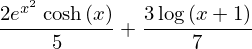

In [179]:
expr = sp.Rational(2,5)*sp.exp(x**2)*sp.cosh(x) + sp.Rational(3,7)*sp.log(x + 1)
f = sp.Lambda(x, expr)
f(x)

## Avaliação de funções

Na SymPy, há dois modos de se avaliar uma função: _simbólico_ ou _numérico_.

A avaliação simbólica é feita através da substituição (`.subs`) na expressão que define a função. Por exemplo,

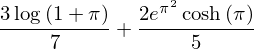

In [180]:
f(x).subs({x: sp.pi})

Com isso, a avaliação numérica pode ser realizada via `.subs().evalf()`:

In [181]:
f(x).subs({x: sp.pi}).evalf()

Entretanto, as `subs` são a forma mais lenta de se fazer isso. Usamos este método apenas quando não estamos preocupados com o desempenho computacional. Ele pode ser útil durante uma fase de prototipagem de software ou quando não precisamos avaliar a substituição com frequência.

Uma forma mais eficiente de avaliação numérica é criando uma _função lambda_ numérica com a `lambdify`.
A `lambdify` transforma expressões SymPy em funções Python, possibilitando o aproveitamento de diversas bibliotecas numéricas. Usamos a `lambdify` como a seguir:

In [182]:
nf = sp.lambdify([x], expr)
pi = float(sp.pi) # sympy.Float -> Python float
nf(pi)

Por padrão, a `lambdify` utiliza a biblioteca matemática padrão da Python, a `math`. O tempo de avaliação de uma `lambdify` é cerca de duas ordens de magnitude mais rápida do que o método `.subs().evalf()`.

## Gráfico de funções

A SymPy possui facilidades gráficas baseadas no pacote [Matplotlib](https://matplotlib.org/), mas de interface bem mais acessível. Ela permite a construção de gráficos 2D e 3D, sem precisarmos nos preocupar com detalhes de configuração secundários.
As funções disponíveis são:

* `plot`: gráficos $x$ versus $y$.
* `plot_parametric`: gráficos de funções paramétricas 2D.
* `plot_implicit`: gráficos de funções implícitas 2D.
* `plot3d`: gráficos de funções de duas variáveis em 3D.
* `plot3d_parametric_line`: gráficos de retas paramétricas tridimensionais.
* `plot3d_parametric_surface`: gráficos de superfícies paramétricas 3D.

Nesta aula, abordaremos as três primeiras funções, usadas para esboçar gráficos bidimensionais. Caso esteja curioso sobre as demais, você pode consultar a documentação do módulo de traçado de gráficos da SymPy [aqui](https://docs.sympy.org/latest/modules/plotting.html).

### Funções explícitas

Considere uma função polinomial $f\!: \mathbb{R} \rightarrow \mathbb{R}$ definida por:

$$f(x) = x^3 - 2x + 1\text{.}$$

Na SymPy, teremos:

In [83]:
f = sp.Lambda(x, x**3 - 2*x + 1)
f(x)

Se desejarmos traçar o gráfico de $f$ restrita aos intervalos $-5 \le x \le 5$ e $-10 \le y \le 10$, usamos a função `plot` assim:

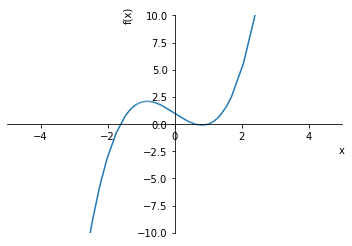

In [90]:
sp.plot(f(x), xlim=(-5, 5), ylim=(-10,10))

ou assim:

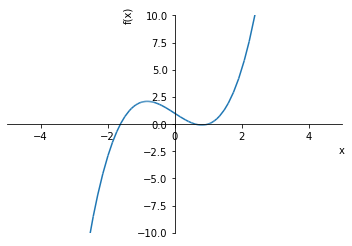

In [130]:
sp.plot(f(x), (x, -5, 5), ylim=(-10,10))

Observe no trecho acima que limitamos o intervalo no eixo $x$ usando `(x, -5, 5)`, enquanto que no eixo $y$ com `ylim=(-10,10)`. Isto acontece porque a função $f$ não depende de $y$.

Podemos configurar a aparência dos gráficos construídos com a `plot` aplicando propriedades em toda a figura (globais) ou em curvas específicas. Algumas opções _globais_ bastante usadas são:

* title : título do gráfico
* xlabel : rótulo do eixo $x$
* ylabel : rótulo do eixo $y$
* legend : exibe/oculta a legenda (`True` ou `False`)
* xscale : escala do eixo $x$ ("linear" ou "log")
* yscale : escala do eixo $y$ ("linear" ou "log")
* axis : exibe/oculta eixos (`True` ou `False`)
* xlim : par de números reais $(x_{\min}, x_{\max})$
* ylim : par de números reais $(y_{\min}, y_{\max})$
* axis_center : par de números reais $(x, y)$, "center" ou "auto"

Por exemplo,

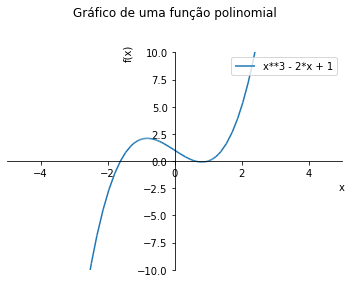

In [142]:
sp.plot(f(x), (x, -5, 5), ylim=(-10,10), legend=True, title="Gráfico de uma função polinomial\n\n")

#### **Exemplo.**
Considere os gráficos:

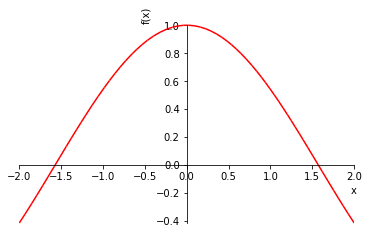

In [309]:
fig1 = sp.plot(sp.cos(x), (x, -2, 2), line_color='r')

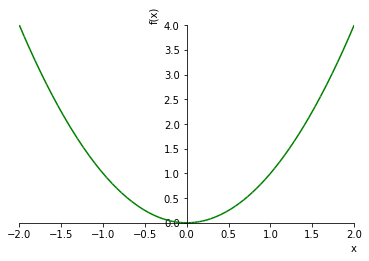

In [308]:
fig2 = sp.plot(x**2, (x, -2, 2), line_color='g')

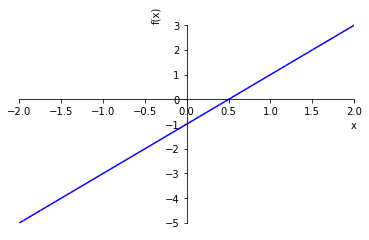

In [307]:
fig3 = sp.plot(2*x - 1, (x, -2, 2), line_color='b')

Se quisermos adicionar as curvas de `fig1` à `fig2`, fazemos:

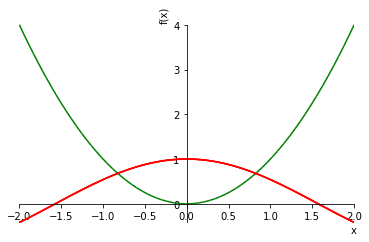

In [312]:
fig2.append(fig1[0])
fig2.show()

Para adicionar **todas** as curvas de `fig2` à `fig3`, basta usarmos a `fig3.extend`.

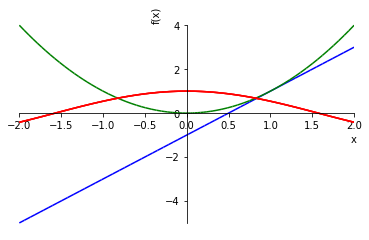

In [313]:
fig3.extend(fig2)
fig3.show()

#### **Exercício.**
(a) Construa o gráfico da função $f(x) = \displaystyle\frac{\operatorname{sen}(x)}{x}$, para $0 < x \le 10\pi$. Para tanto,

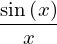

In [174]:
# defina a função lambda aqui
x = sp.Symbol('x')
f = sp.Lambda(x, sp.sin(x)/x)
f(x)

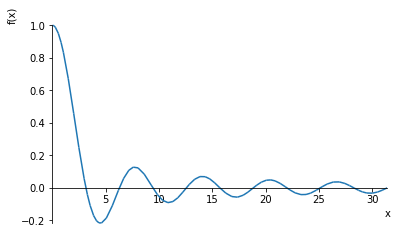

In [175]:
# e plote o gráfico de f aqui
sp.plot(f(x), (x, 0.001, 10*sp.pi), axis_center=(0,0))

(b) Você experimentou algum resultado inesperado? Qual e porque?

_Digite sua resposta aqui_

### Funções implícitas

A SymPy possui uma função específica para traçar gráficos de funções definidas implicitamente. Ela está definida dentro do módulo `sympy.plotting`. Por isso, por conveniência, importamos este módulo a parte:

In [189]:
import sympy.plotting as plt

Considere a elipse $x^2 + xy + y^2 = 1$, definida na SymPy conforme abaixo:

In [195]:
x,y = sp.symbols('x,y')
elipse = sp.Eq(x**2 + x*y + y**2, 1)
elipse

O gráfico da elipse pode ser construído com a função `sympy.plotting.plot_implict`:

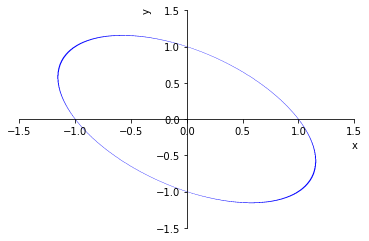

In [201]:
plt.plot_implicit(elipse, (x,-1.5,1.5), (y,-1.5,1.5))

#### **Exercício.**
Considere uma função definida por $|\!\cos(z^2)| = 1$, com $z \in \mathbb{C}$.

(a) Primeiro, defina símbolos reais $x$ e $y$.

(b) Em seguida, defina $z = x + yi$ e $w(z) = \cos(z^2)$

(c) Expanda $w(z)$ na forma $w = X + Yi$, para $X$ e $Y$ apropriados. Dica: informe à `expand` que a expressão envolve números complexos.

(d) Agora, defina $w_{\operatorname{abs}} = |w|$, expandindo do mesmo modo que em (c).

(e) Plote o gráfico de $w_{\operatorname{abs}}^2 - 1$ usando a função `plot_implicit`.

### Funções paramétricas

Agora, vejamos como a SymPy permite o esboço do gráfico de curvas definidas parametricamente. Ela possui uma função especial denominada `plot_parametric`, do módulo `plotting`.

#### **Exemplo.**
Considere, por exemplo, a função [coração](http://mathworld.wolfram.com/HeartCurve.html) definida por:

In [233]:
sp.var('t')
xc = 16*(sp.sin(t)**3)
yc = 13*sp.cos(t) - 5*sp.cos(2*t) - 2*sp.cos(3*t) - sp.cos(4*t)
xc,yc

Seu gráfico é:

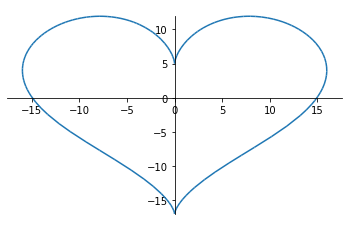

In [219]:
fig = plt.plot_parametric(xc, yc, (t, 0, 2*sp.pi))

Atualmente, a `plot` suporta apenas coordenadas cartesianas. Contudo, podemos usar a `parametric_plot` para traçar gráficos usando coordenadas polares, esféricas e cilíndricas.



#### **Exercício.**
Desenhe o gráfico da [Cocleoide](https://en.wikipedia.org/wiki/Cochleoid):

$$x=\frac{a\sin t\cos t}{t}, \quad y=\frac{a\sin^2 t}{t}\text{,}\quad a,t\in \mathbb{R}\text{.}$$

(a) Tomando $a = 1$.

In [232]:
# Digite sua solução aqui.

(b) Tomando $a = 4$.

In [232]:
# Digite sua solução aqui.

## Funções definidas por partes

Considere a função $f\!: \mathbb{R} \rightarrow \mathbb{R}$ definida por:

$$
f(x) = \begin{cases}
x^2 & \text{se } x < 0\\
x & \text{caso contrário}\\
\end{cases}
$$

Para definir esta função na SymPy, escrevemos

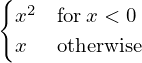

In [240]:
expr = sp.Piecewise(
    (x**2, x < 0),
    (x, x >= 0)
)
f = sp.Lambda(x, expr)
f(x)

cujo gráfico é:

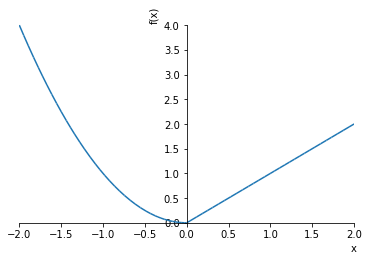

In [241]:
sp.plot(f(x), (x, -2, 2))

#### **Exercício.**
Considere a função $f\!: \mathbb{R} \rightarrow \mathbb{R}$ definida por:

$$
f(x) = \begin{cases}
1 - x^2 & \text{se } x < 0\\
x + 2 & \text{caso contrário}\\
\end{cases}
$$

(a) Defina a função $f$ na SymPy.

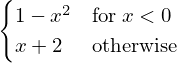

In [247]:
expr = sp.Piecewise(
    (1 - x**2, x < 0),
    (x + 2, x >= 0)
)
f = sp.Lambda(x, expr)
f(x)

(b) Agora, trace o gráfico de $f$ com o comando `sympy.plot`:

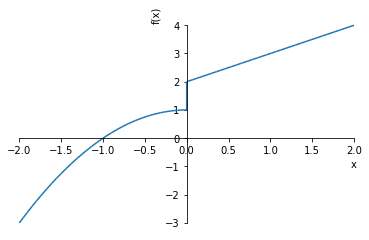

In [248]:
sp.plot(f(x), (x, -2, 2))

(c) O que você observa no gráfico da função acima? Ele foi traçado corretamente? Como você interpreta esse resultado?

_Digite sua resposta aqui_

## Zeros de funções

Na SymPy, as equações não são representadas utilizando os operadores `=` ou `==`. Um único sinal de igual `=` significa atribuição e dois iguais `==` representa o teste lógico de igualdade. Podemos definir equações usando a função `sympy.Eq` ou expressões ordinárias.

Dadas duas expressões ordinárias representando os lados esquerdo e direito de uma equação

In [260]:
lesq = sp.exp(x) # lado esquerdo da equação
ldir = 1 # lado direito da equação

definimos a equação associada a estes lados fazendo:

In [261]:
eq1 = sp.Eq(lesq, ldir)

ou simplesmente

In [262]:
eq2 = lesq - ldir

Vejamos o resultado disso:

In [263]:
eq1, eq2

A `eq1` é a forma tradicional de se construir uma equação. Já a `eq2` será equivalente à `eq1` em algumas situações onde a SymPy fará implicitamente `eq2 = 0`.

A função SymPy [`sympy.solve`](https://docs.sympy.org/latest/tutorial/solvers.html) é a mais versátil para equações não lineares ou sistemas não lineares. Contudo, para equações de uma única variável, recomenda-se utilizar a [`sympy.solvset`](https://docs.sympy.org/latest/modules/solvers/solveset.html). Vejamos a diferença:

In [269]:
sp.solveset(eq1, x)

In [268]:
sp.solve(eq2, x)

Observe que a `solve` calculou apenas uma raiz, aquele com $n = 0$.

#### **Exercício.**
Analise o resultado abaixo:

In [10]:
x,a = sp.symbols("x,a", real=True)
sp.solveset(a*x**2 - a, x)

(a) O que há de errado?

Observe que a `sympy.solve` assumiu $a \ne 0$, pois sabemos que qualquer $x\in \mathbb{R}$ seria solução da equação quando tivermos $a$ igual zero.

#### **Exercício.**
(a) Use a `solve` para resolver a equação $\cos(x) = 0$, para $x \in \mathbb{R}$.

In [271]:
# Digite sua solução aqui

(b) Como você interpreta a resposta do software? Foram exibidas todas as soluções da equação?

_Digite sua resposta aqui_

(c) Mostre que esta limitação pode ser contornada com a função `solveset`.

(d) Você conseguiria simplificar ainda mais a solução obtida em (c)?

_Digite aqui sua resposta_

#### **Exercício.**
Considere a equação:

$$
\frac{x}{\sqrt{x + 1}} = 1\text{,}\quad\text{ para } x \in \mathbb{R}\text{.}
$$

(a) Resolva a equação usando o comando `solve`.

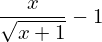

In [273]:
expr = x/sp.sqrt(x + 1) - 1
expr

(b) A resposta da SymPy soluciona o problema?

_Digite aqui sua resposta_

**Observação.** Com o Maxima, conforme citado na página 228 do nosso livro-texto, são obtidas duas raízes, uma positiva e outra negativa. No entanto, a negativa não é válida no sentido da equação, pois $x$ nunca será negativo.

#### **Exercício.**
(a) Tente resolver abaixo por meio do comando `solve`.

$$
\cos(x) = x^2\text{,}\quad\text{ para } x \in \mathbb{R}\text{.}
$$

(b) A equação dada têm soluções reais?
Sugestão: para responder a esta pergunta, analise os gráficos das curvas $y = \cos(x)$ e $y = x^2$.

(c) Agora, tente resolver esta equação por meio da função `sympy.nsolve`.

#### **Exercício.**
Considere o resultado abaixo para a equação: $\displaystyle 2^x = x^2$.

In [316]:
x = sp.Symbol('x')
expr = x**2 - 2**x
sp.solve(expr, x)

(a) Há algo de errado? Trace o gráfico de `expr` e tente responder a esta pergunta.

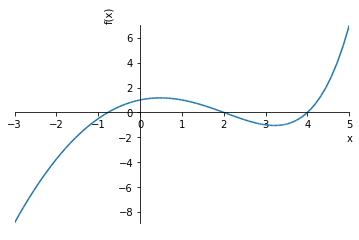

In [39]:
sp.plot(expr, (x, -3,5))

_Digite aqui sua resposta_

#### **Exercício.**
Analise o resultado abaixo:

In [318]:
x = sp.Symbol('x')
expr = x**3 - 4*x + 1
expr

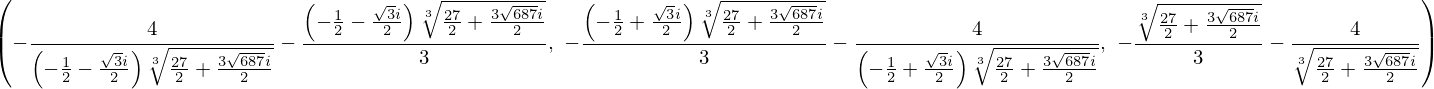

In [319]:
[x1, x2, x3] = sp.solve(expr, x)
x1,x2,x3

(a) Com base no resultado acima, você diria que $f$ possui quantas raı́zes reais e quantas raízes complexas?

_Digite aqui sua resposta_

(b) Você pode extrair a parte imaginária de um símbolo usando a função `sympy.im`. Faça isso com as três raízes obtidas acima.

In [66]:
sp.radsimp(sp.im(x1))

In [67]:
sp.radsimp(sp.im(x2))

In [68]:
sp.radsimp(sp.im(x3))

(c) Use o comando `sympy.radsimp` para simplificar as partes imaginárias obtidas no item anterior.
O que você pode concluir sobre as raı́zes de $f$?

In [324]:
# Digite seu código aqui

In [325]:
# Digite seu código aqui

In [326]:
# Digite seu código aqui

(d) Esboce o gráfico de $f$ no intervalo $[-3,3]$. Relacione o gráfico obtido com o resultado do item (c).

In [323]:
# Digite seu código aqui

_Digite sua resposta aqui_

#### **Exercício.**
Considere a função polinomial do terceiro grau $f\!: \mathbb{R} \rightarrow \mathbb{R}$, $f(x) = x^3 - 4x + k$, em que $k$ é uma constante real.

(a) Trace o gráfico de $f$ com $k = 1$ para determinar quantas raı́zes reais distintas $f$ possui.

In [331]:
sp.plot(f(x).subs({k: 1}), (x, -3, 2.5))

NameError: name 'k' is not defined

(b) Agora, trace o gráfico de $f$ para $k = 4$.
Quantas raı́zes reais distintas $f$ possui neste caso?

In [332]:
sp.plot(f(x).subs({k: 4}), (x, -3, 2.5))

NameError: name 'k' is not defined

(c) Utilize a `sympy.solve` para determinar um valor de $k > 0$ para o qual $f$ possui uma raiz real de multiplicidade 2.

In [134]:
# Primeiro, determinamos os pontos críticos de f
[x1, x2] = sp.solve(3*x**2 - 4)

In [333]:
# Depois, resolvemos para k
[k1] = sp.solve(f(x).subs({x: x1}), k)
k1

NameError: name 'k' is not defined

(d) Trace o gráfico de $f$ com o valor de $k$ obtido em (c).

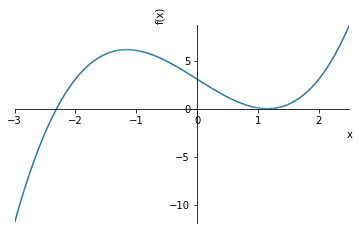

In [151]:
sp.plot(f(x).subs({k: k1}), (x, -3, 2.5))

(d) O valor de $k$ que soluciona a questão proposta no item anterior é único? Justifique usa resposta.

## Atividade Prática 6

Formule uma sequência didática para aplicação
de uma atividade semelhante à Atividade 5.1 do livro-texto para _funções trigonométricas_.

Especifique os objetivos, os conceitos matemáticos explorados e de que
maneiras esses conceitos podem ser explorados.

## Saiba mais

Este bloco de notas é baseado nas referências a seguir:

* GIRALDO, V.; CARVALHO, L.M.. Funções e Novas Tecnologias. TEMA - Tendências em Matemática Aplicada e Computacional, [S.l.], v. 3, n. 1, p. 111-119, june 2002. ISSN 2179-8451. Available at: <https://tema.sbmac.org.br/tema/article/view/429>. Date accessed: 30 sep. 2019. doi:https://doi.org/10.5540/tema.2002.03.01.0111.

* STEWART, John M. Python for scientists. Cambridge University Press, 2017.
  https://doi.org/10.1017/CBO9781107447875

* JOHANSSON, Robert; JOHANSSON, Robert; JOHN, Suresh. Numerical Python. Apress, 2019.
   https://doi.org/10.1007/978-1-4842-4246-9

&copy; 2019 Vicente Helano<br>
UFCA | Universidade Federal do Cariri<br>
Mestrado Profissional em Ensino de Matemática